**Lidia Polyakov 207550096
and Shanee Gat 227367448**


In [ ]:

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
import pandas as pd
import numpy as np
import sklearn as skl
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

from google.colab import drive

drive.mount("/gdrive", force_remount=True)
df = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/raw_dataset.csv")


Mounted at /gdrive


**Describe your dataset & features before processing it**


In [ ]:
df.head()

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
0,Future Gamer,Submission,Character,2020,OnlineCasion.ca,2020-04-06T14:32:36-04:00,1177,0,8,22,"gamer, video games, science, onlinecasino.ca",Future Gamer is a model of what researchers at...,"In April 2020, the website OnlineCasino.ca[1] ...","From sleep deprivation and dehydration, to lac..."
1,Future Gamer,Submission,Character,2020,OnlineCasion.ca,2020-04-06T14:32:36-04:00,1195,0,8,22,"gamer, video games, science, onlinecasino.ca",Future Gamer is a model of what researchers at...,"In April 2020, the website OnlineCasino.ca[1] ...","From sleep deprivation and dehydration, to lac..."
2,Cooking Mama Cookstar Cryptomining Rumor,Submission,Controversy,2020,4chan,2020-04-06T17:04:33-04:00,3128,0,23,14,"cooking mama, crypto, cryptocurrency, bitcoin,...",Cooking Mama: Cookstar Cryptomining Rumor refe...,NaN,"On April 4th, 2020, in a /v/[3] thread dedicat..."
3,UNRAVEL / Donny's Theme,Submission,Song,2019,iFunny,2020-04-06T16:49:52-04:00,591,13,3,2,"tokyo ghoul, unravel, tk, tk from ling tosite ...","""UNRAVEL"" is a song by Japanese musician TK th...","On July 11th, 2014, episode two ""Incubation"" o...","On March 1st, 2019, iFunny[2] user SAINT_PABLO..."
4,Sloof,Submission,Advertisement,2020,April Fools' Day 2020,2020-04-05T09:44:30-04:00,2202,0,14,3,"sloof co, comics, webcomics, artists, ad, adve...",Sloof refers to a series of webcomics featurin...,"Between March 31st and April 1st, 2020, severa...",Spread One such participant in the prank was c...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          21453 non-null  object
 1   status        21453 non-null  object
 2   type          6590 non-null   object
 3   origin_year   21453 non-null  object
 4   origin_place  21448 non-null  object
 5   date_added    21453 non-null  object
 6   views         21453 non-null  int64 
 7   videos        21453 non-null  int64 
 8   photos        21453 non-null  int64 
 9   comments      21453 non-null  int64 
 10  tags          21450 non-null  object
 11  about         19211 non-null  object
 12  origin        11824 non-null  object
 13  other_text    16895 non-null  object
dtypes: int64(4), object(10)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,views,videos,photos,comments
count,2.145300e+04,21453.000000,21453.000000,21453.000000
mean,7.616789e+04,6.781336,61.864028,42.694075
std,3.274469e+05,40.768044,1577.167781,487.681538
min,2.000000e+00,-1.000000,-4.000000,0.000000
25%,2.829000e+03,0.000000,1.000000,4.000000
50%,1.300900e+04,0.000000,8.000000,13.000000
75%,4.865600e+04,4.000000,26.000000,35.000000
max,1.458502e+07,3966.000000,219293.000000,64644.000000


**Describe the process of cleansing, fixing, prepping the dataset**

In [ ]:
#print count of nan/null values in our dataset, check if there are any empty values
print(df.isnull().any().any())
print(df.isnull().sum())

True
name                0
status              0
type            14863
origin_year         0
origin_place        5
date_added          0
views               0
videos              0
photos              0
comments            0
tags                3
about            2242
origin           9629
other_text       4558
dtype: int64


In [ ]:
#delete row with empty values
df = df.dropna()
#delete irrelevant features
df = df.drop('date_added', axis=1)
df = df.drop('other_text', axis=1)
df = df.drop('origin', axis=1)
df = df.drop('tags', axis=1)
df = df.drop('about', axis=1)
print(df.isnull().any().any())
print(df.isnull().sum())

False
name            0
status          0
type            0
origin_year     0
origin_place    0
views           0
videos          0
photos          0
comments        0
dtype: int64


In [ ]:
print(df.groupby('type').size())
df.head()

type
Activist          7
Actor            20
Advertisement    53
Album             4
Animal           69
                 ..
Visual Effect     2
Vlogger          18
Web Series       32
Webcomic         28
Writer            2
Length: 92, dtype: int64


,name,status,type,origin_year,origin_place,views,videos,photos,comments
0,Future Gamer,Submission,Character,2020,OnlineCasion.ca,1177,0,8,22
1,Future Gamer,Submission,Character,2020,OnlineCasion.ca,1195,0,8,22
3,UNRAVEL / Donny's Theme,Submission,Song,2019,iFunny,591,13,3,2
4,Sloof,Submission,Advertisement,2020,April Fools' Day 2020,2202,0,14,3
5,Full House Intro Parodies,Submission,Parody,2010,YouTube,1369,0,0,0


**Find interesting correlations between features, explain these correlations and**

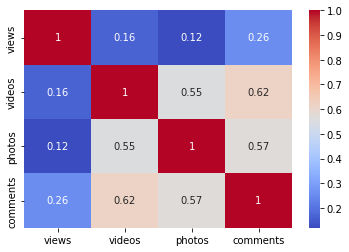

In [ ]:
#only for original numeric
correlations = df.corr()
sns.heatmap(correlations, cmap='coolwarm', annot=True)
plt.show()

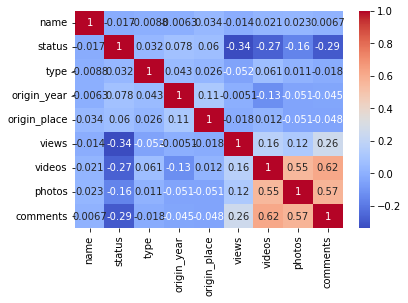

In [ ]:
#categotical to numeric
df['name'] = df['name'].astype('category').cat.codes
df['status'] = df['status'].astype('category').cat.codes
df['type'] = df['type'].astype('category').cat.codes
df['origin_year'] = df['origin_year'].astype('category').cat.codes
df['origin_place'] = df['origin_place'].astype('category').cat.codes

#for all relevant features
correlations = df.corr()
sns.heatmap(correlations, cmap='coolwarm', annot=True)
plt.show()


#we can see that the most influential features are videos, photos amd comments

**Describe distribution of interesting features and what can be learned about them**

Descriptive statistics for videos:
count    4308.000000
mean        8.348886
std        34.250239
min         0.000000
25%         0.000000
50%         1.000000
75%         6.000000
max       856.000000
Name: videos, dtype: float64


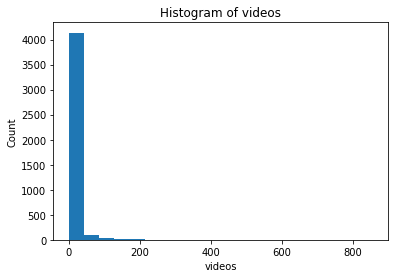

Descriptive statistics for photos:
count     4308.000000
mean        90.592618
std        973.225887
min         -4.000000
25%          5.000000
50%         13.000000
75%         28.000000
max      36752.000000
Name: photos, dtype: float64


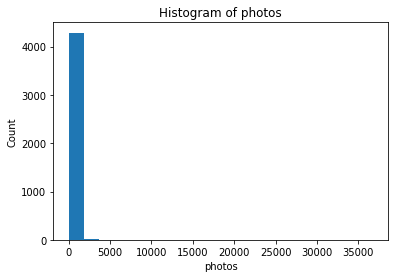

Descriptive statistics for comments:
count    4308.000000
mean       44.496286
std       118.098662
min         0.000000
25%         6.000000
50%        17.500000
75%        42.000000
max      3041.000000
Name: comments, dtype: float64


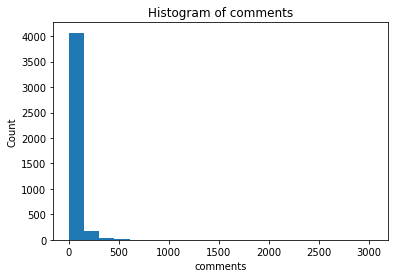

Descriptive statistics for status:
count    4308.000000
mean        1.713092
std         0.691482
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: status, dtype: float64


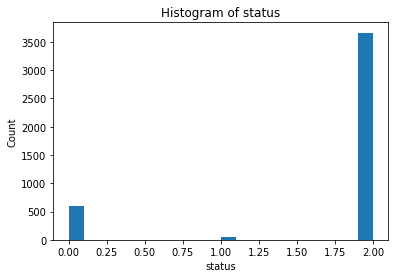

Descriptive statistics for origin_year:
count    4308.000000
mean       95.610492
std        13.249410
min         0.000000
25%        94.000000
50%       100.000000
75%       102.000000
max       106.000000
Name: origin_year, dtype: float64


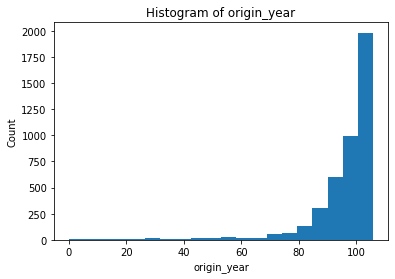

Descriptive statistics for origin_place:
count    4308.000000
mean      977.646936
std       476.043433
min         0.000000
25%       586.750000
50%      1130.000000
75%      1374.000000
max      1576.000000
Name: origin_place, dtype: float64


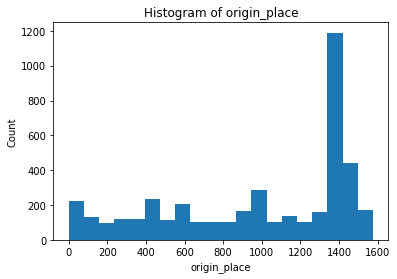

Descriptive statistics for views:
count    4.308000e+03
mean     1.031372e+05
std      5.462401e+05
min      8.000000e+00
25%      6.165000e+03
50%      1.679100e+04
75%      4.907500e+04
max      1.458502e+07
Name: views, dtype: float64


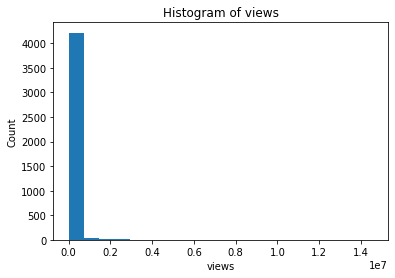

In [ ]:
interesting_features = ['videos', 'photos', 'comments', 'status', 'origin_year', 'origin_place', 'views']

# describe the distribution of each interesting feature
for feature in interesting_features:
    print(f"Descriptive statistics for {feature}:")
    print(df[feature].describe())
    
    # create a histogram for each interesting feature
    plt.hist(df[feature], bins=20)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()


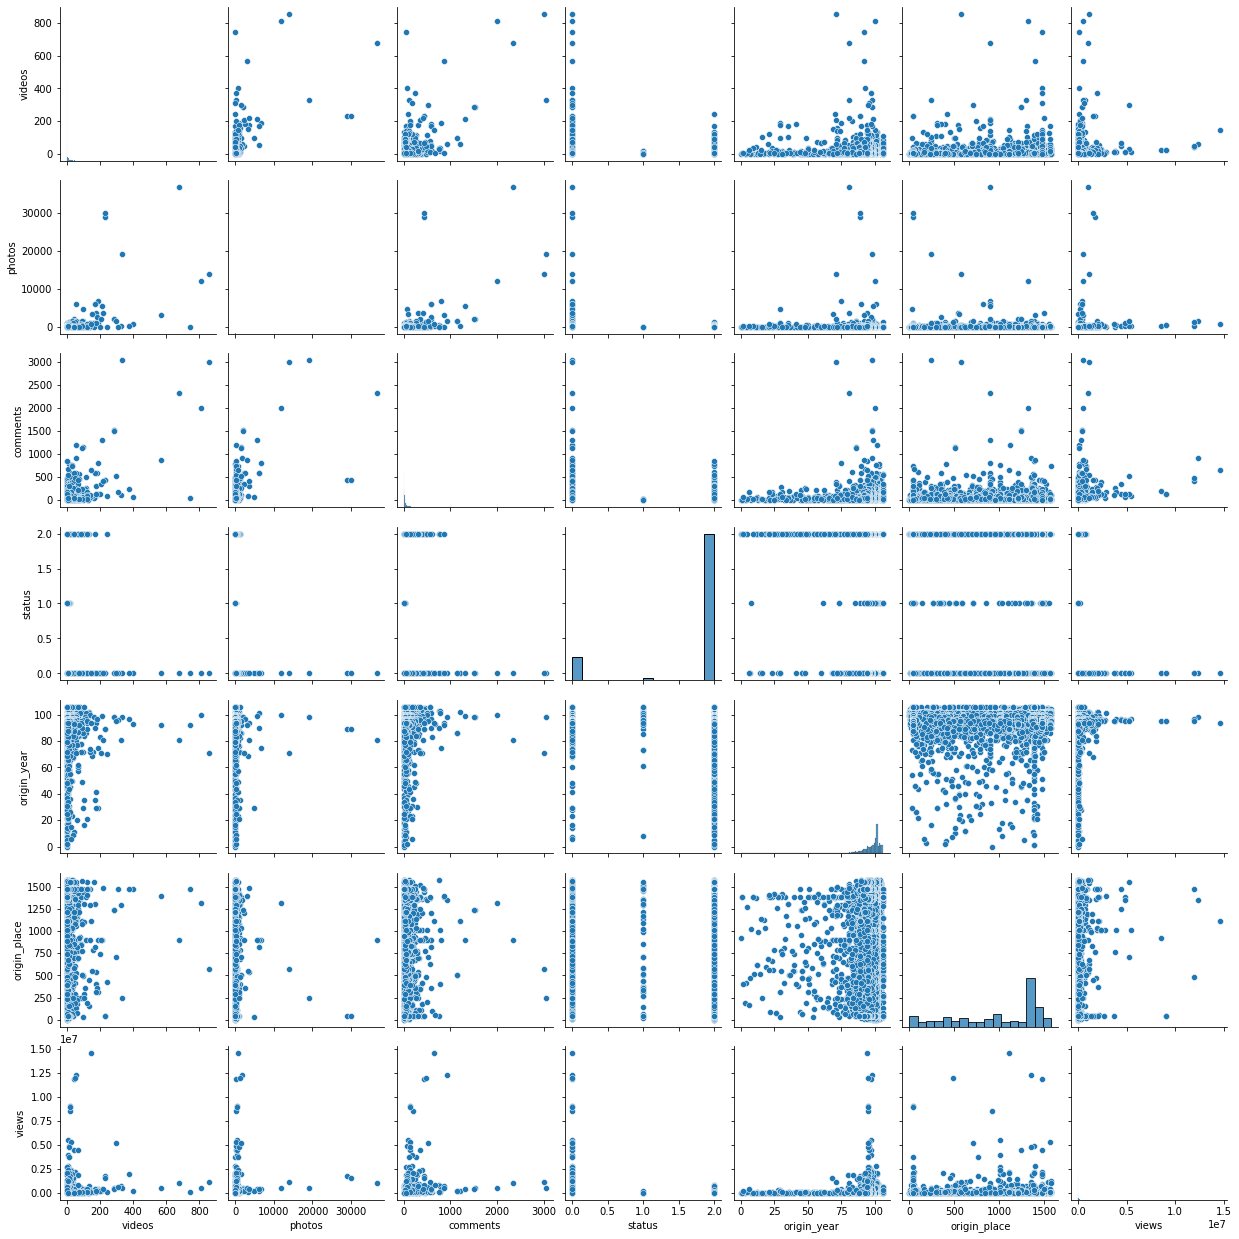

In [ ]:
sns.pairplot(df[['videos', 'photos', 'comments', 'status', 'origin_year', 'origin_place', 'views']])
plt.show()



**Find the best features that influence the class column. Describe your process of finding them**

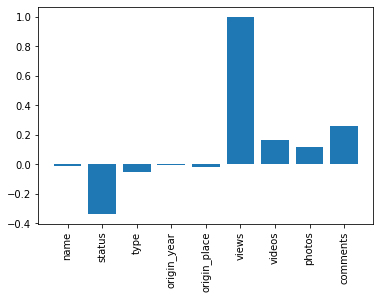

['status', 'views', 'videos', 'photos', 'comments']


In [ ]:
corr = df.corr()['views']
plt.bar(corr.index, corr.values)
plt.xticks(rotation=90)
plt.show()
best_features = corr[abs(corr) > 0.1].index.tolist()
print(best_features)
#we can see from the plot that the best fetures are status, videos, phothos and comments

calculate correlation coefficient and the scatter plot, select the features that have a strong linear relationship with the target column 'views'

correlation coefficient : -0.33889762645553256


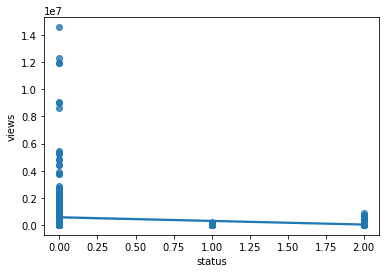

In [ ]:
sns.regplot(data=df, x='status', y='views')
corr_coef = df['views'].corr(df['status'])
print(f"{'correlation coefficient '}: {corr_coef}")

correlation coefficient : 0.1643472901114591


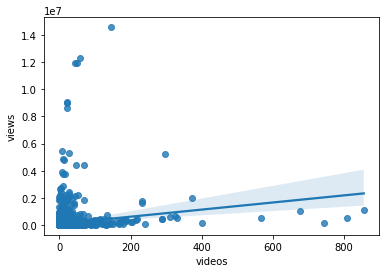

In [ ]:
sns.regplot(data=df, x='videos', y='views')
corr_coef = df['views'].corr(df['videos'])
print(f"{'correlation coefficient '}: {corr_coef}")

correlation coefficient : 0.11963265898651347


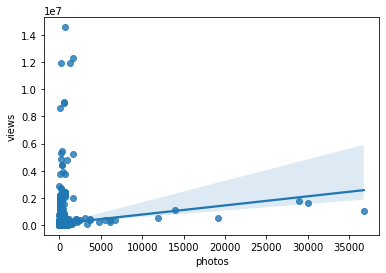

In [ ]:
sns.regplot(data=df, x='photos', y='views')
corr_coef = df['views'].corr(df['photos'])
print(f"{'correlation coefficient '}: {corr_coef}")

correlation coefficient : 0.1688355886496579


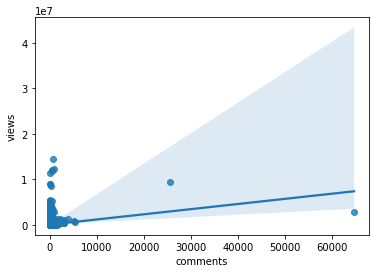

In [ ]:
sns.regplot(data=df, x='comments', y='views')
corr_coef = df['views'].corr(df['comments'])
print(f"{'correlation coefficient '}: {corr_coef}")

In [ ]:
df.to_csv("/gdrive/MyDrive/Colab Notebooks/ready_dataset.csv", index=False)
df = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/ready_dataset.csv")


**Create a classifier model that will guess the class. Explain your process of optimizing its accuracy**


In [ ]:
age4 = pd.qcut(df['views'], 4)
df.pivot_table('views', age4,aggfunc='mean')
#a views groups of percentiles

,views
views,
"(7.999, 6165.0]",2818.795729
"(6165.0, 16791.0]",10945.164345
"(16791.0, 49075.0]",28669.648097
"(49075.0, 14585024.0]",370115.154132


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB # 1. choose model class
y = df['views']
X = df.drop([ 'origin_year', 'origin_place', 'name'], axis=1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=1)
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data (output is numpy array)

ypred = pd.Series(y_model,name="prediction")
predicted = pd.concat([Xtest.reset_index(),ytest.reset_index(),ypred],axis=1)
print(metrics.accuracy_score(ytest, y_model))

predicted

0.008356545961002786


,index,status,type,views,videos,photos,comments,index,views,prediction
0,3843,0,5,55556,38,1233,76,3843,55556,56183
1,3714,2,56,1798,0,3,5,3714,1798,1802
2,3945,2,84,28034,10,28,50,3945,28034,28000
3,407,2,17,5298,0,5,1,407,5298,5292
4,2852,2,47,34791,0,63,20,2852,34791,34769
...,...,...,...,...,...,...,...,...,...,...
1072,1006,2,4,6337,28,0,0,1006,6337,6319
1073,4088,0,5,67470,29,236,20,4088,67470,67363
1074,83,2,58,134,0,1,0,83,134,142
1075,1498,2,37,16434,1,23,6,1498,16434,16484


In [ ]:
X = df.drop([ 'origin_year', 'origin_place', 'name'],axis=1)
y = df[['views']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (3015, 6)
The shape of X_test is        (1293, 6)
The shape of y_train is       (3015, 1)
The shape of y_test is        (1293, 1)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(max_depth=4,random_state = 42)

# training the model
dt.fit(X_train, y_train)

# printing the score of the model
print("How good is our model?", dt.score(X_test, y_test))

# calculating the predictions
y_pred = dt.predict(X_test)


# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))


How good is our model? 0.0015467904098994587
The test accuracy score of Decision Tree is  0.0015467904098994587


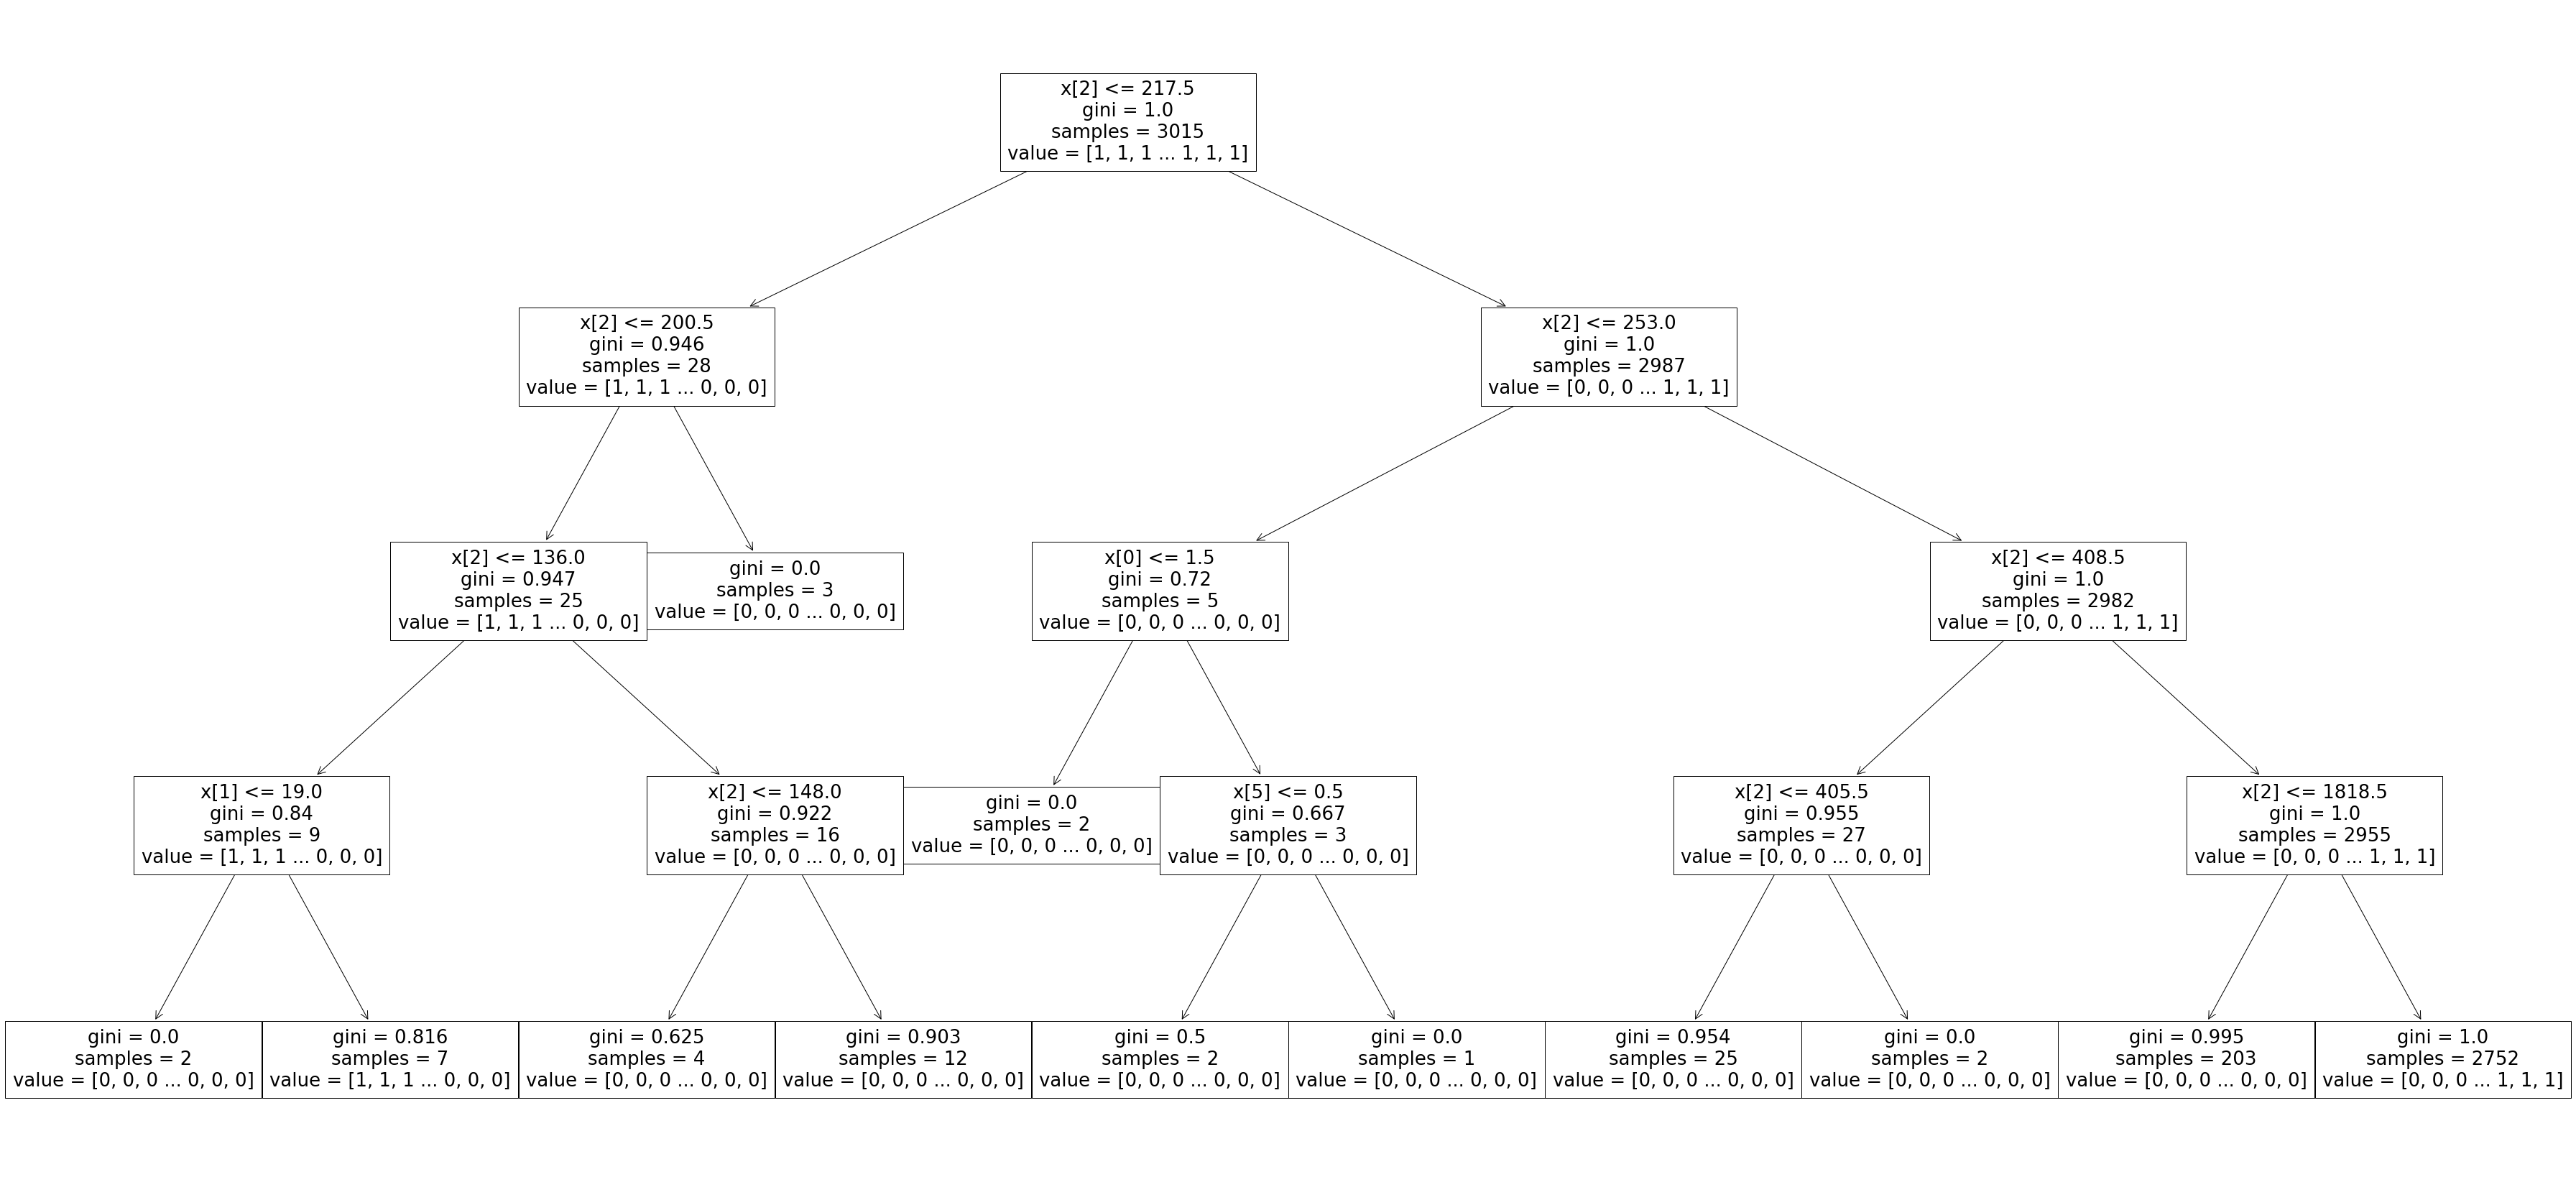

In [ ]:
#draw the decision tree with all the Gini Index scores
plt.figure(figsize=(64,30))
plot_tree(dt)
plt.show()